# Occupancy Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

## Importing the dataset

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv(r'C:\Users\phuoc\OneDrive\Desktop\School\ML Boot Camp\Projects\Project_4\heart_failure_clinical_records_dataset.csv')
df.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#df=df.drop(['time'], axis = 1)
df = pd.DataFrame(df.iloc[:,[0,4,7,-1]])

# Encoding the dataset

## No encoding needed for this dataset

## Raw data visualisation and statistics

In [4]:
df.describe()

,age,ejection_fraction,serum_creatinine,DEATH_EVENT
count,299.000000,299.000000,299.00000,299.00000
mean,60.833893,38.083612,1.39388,0.32107
std,11.894809,11.834841,1.03451,0.46767
min,40.000000,14.000000,0.50000,0.00000
25%,51.000000,30.000000,0.90000,0.00000
50%,60.000000,38.000000,1.10000,0.00000
75%,70.000000,45.000000,1.40000,1.00000
max,95.000000,80.000000,9.40000,1.00000


In [5]:
df

,age,ejection_fraction,serum_creatinine,DEATH_EVENT
0,75.0,20,1.9,1
1,55.0,38,1.1,1
2,65.0,20,1.3,1
3,50.0,20,1.9,1
4,65.0,20,2.7,1
...,...,...,...,...
294,62.0,38,1.1,0
295,55.0,38,1.2,0
296,45.0,60,0.8,0
297,45.0,38,1.4,0


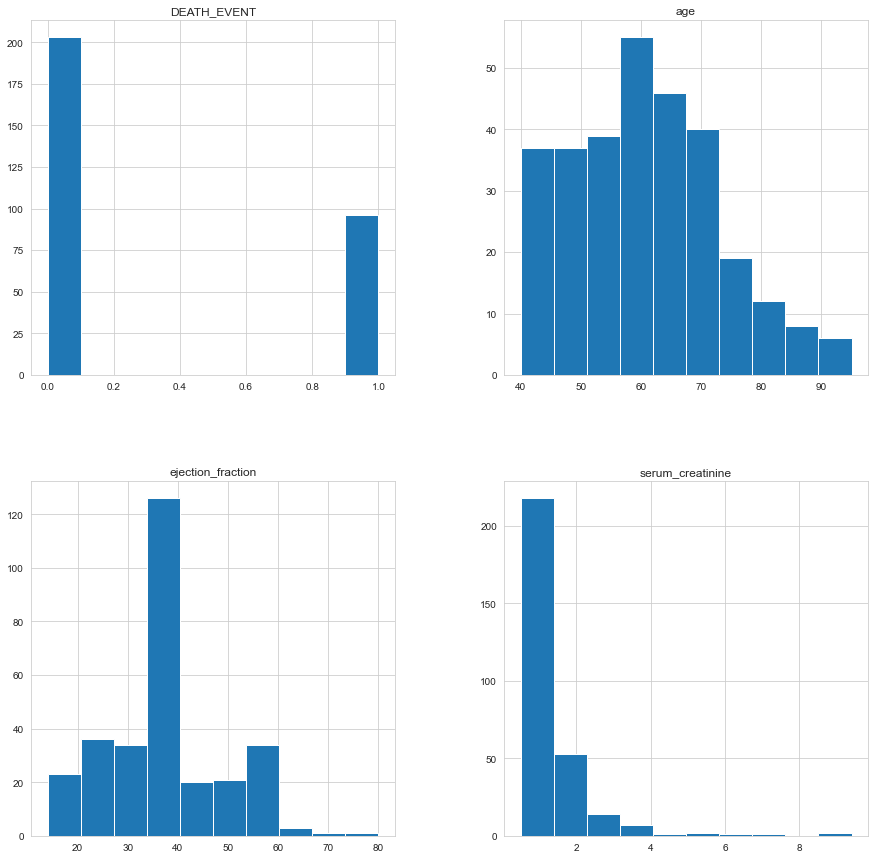

In [6]:
# histogram plots to visualise data distribution
df.hist(figsize=(15, 15))
plt.show()

## Taking care of missing data

In [7]:
print(df.isnull().sum()) 
print(sum(df.isnull().sum()))

age                  0
ejection_fraction    0
serum_creatinine     0
DEATH_EVENT          0
dtype: int64
0



## Data cleaning Statregy:
<br> No missing data, no out of range data<br> 



## Data visualisation (pre-exploratory)

age
ejection_fraction
serum_creatinine
DEATH_EVENT
4
0 1


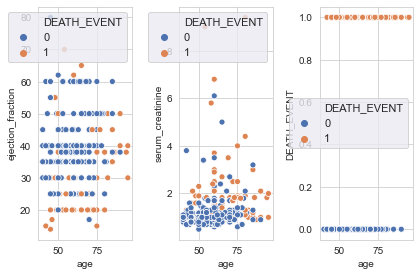

1 2


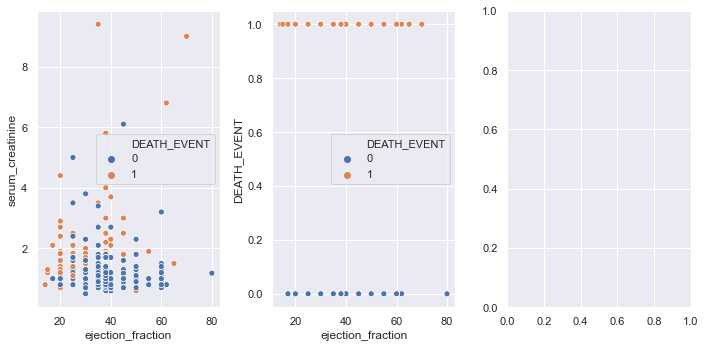

In [8]:
#understanding Pandas
ListAttr = []
lengthOfList = len(df)
for i in df:
    print(i)
    ListAttr.append(i)
print(len(ListAttr))    

for i in range(len(ListAttr)-1):
    for j in range(i+1,len(ListAttr)-1,3):
        print(i,j)
        #f, axes = plt.subplots(1, 2)
        #plt.figure(figsize=(5, 5))
        #sns.set_style()
        #sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j], hue=ListAttr[-1])
        #plt.show()
        
        f, axes = plt.subplots(1, 3)
        #plt.figure(figsize=(10, 10))
        sns.set(rc={'figure.figsize':(10,5)})
        sns.set_style()
        sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j]  , hue=ListAttr[-1], ax=axes[0])
        if (j+1 <= len(ListAttr)-1):
            sns.set_style()
            sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j+1], hue=ListAttr[-1], ax=axes[1])
            if (j+2 <= len(ListAttr)-1):
                sns.set_style()
                sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j+2], hue=ListAttr[-1], ax=axes[2])
        f.tight_layout()
        plt.show()
print()

## Dealing with data imbalance

### 1. Generate synthetic samples

## Splitting the dataframe in train and test sets

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df.iloc[:,:], test_size = 0.2, random_state = 0)
print(df_train)

      age  ejection_fraction  serum_creatinine  DEATH_EVENT
134  81.0                 35              1.18            0
145  50.0                 30              0.70            0
63   45.0                 35              1.00            1
292  52.0                 38              1.00            0
284  50.0                 40              0.80            0
..    ...                ...               ...          ...
251  55.0                 35              0.80            0
192  50.0                 40              0.70            0
117  85.0                 60              3.20            0
47   60.0                 38              0.60            1
172  70.0                 60              1.10            0

[239 rows x 4 columns]


In [10]:
print(df_test)

        age  ejection_fraction  serum_creatinine  DEATH_EVENT
206  40.000                 40              0.80            0
188  60.667                 40              1.00            0
12   45.000                 30              1.10            1
219  55.000                 35              0.70            0
237  70.000                 30              1.20            0
136  65.000                 60              0.90            0
228  65.000                 25              5.00            0
205  50.000                 45              1.00            0
52   60.000                 62              6.80            1
108  63.000                 38              1.10            0
240  70.000                 35              1.30            0
15   82.000                 50              1.30            1
184  58.000                 25              1.20            1
246  55.000                 25              1.10            1
22   68.000                 35              0.90            1
74   69.

## Scaling the train set features 

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_train_scaled= min_max_scaler.fit_transform(df_train)

df_train_scaled= pd.DataFrame(data= df_train_scaled, columns=ListAttr)
print(df_train_scaled)
df_test_scaled= min_max_scaler.transform(df_test)
df_test_scaled= pd.DataFrame(data= df_test_scaled, columns=ListAttr)
print(df_test_scaled)


          age  ejection_fraction  serum_creatinine  DEATH_EVENT
0    0.759259           0.437500          0.076404          0.0
1    0.185185           0.333333          0.022472          0.0
2    0.092593           0.437500          0.056180          1.0
3    0.222222           0.500000          0.056180          0.0
4    0.185185           0.541667          0.033708          0.0
..        ...                ...               ...          ...
234  0.277778           0.437500          0.033708          0.0
235  0.185185           0.541667          0.022472          0.0
236  0.833333           0.958333          0.303371          0.0
237  0.370370           0.500000          0.011236          1.0
238  0.555556           0.958333          0.067416          0.0

[239 rows x 4 columns]
         age  ejection_fraction  serum_creatinine  DEATH_EVENT
0   0.000000           0.541667          0.033708          0.0
1   0.382722           0.541667          0.056180          0.0
2   0.092593       

## Features' Correlation coefficients and heatmap

In [12]:
correlation=df_train_scaled.corr(method='pearson')
print(correlation)

                        age  ejection_fraction  serum_creatinine  DEATH_EVENT
age                1.000000           0.080409          0.212245     0.242167
ejection_fraction  0.080409           1.000000         -0.134936    -0.319034
serum_creatinine   0.212245          -0.134936          1.000000     0.293903
DEATH_EVENT        0.242167          -0.319034          0.293903     1.000000


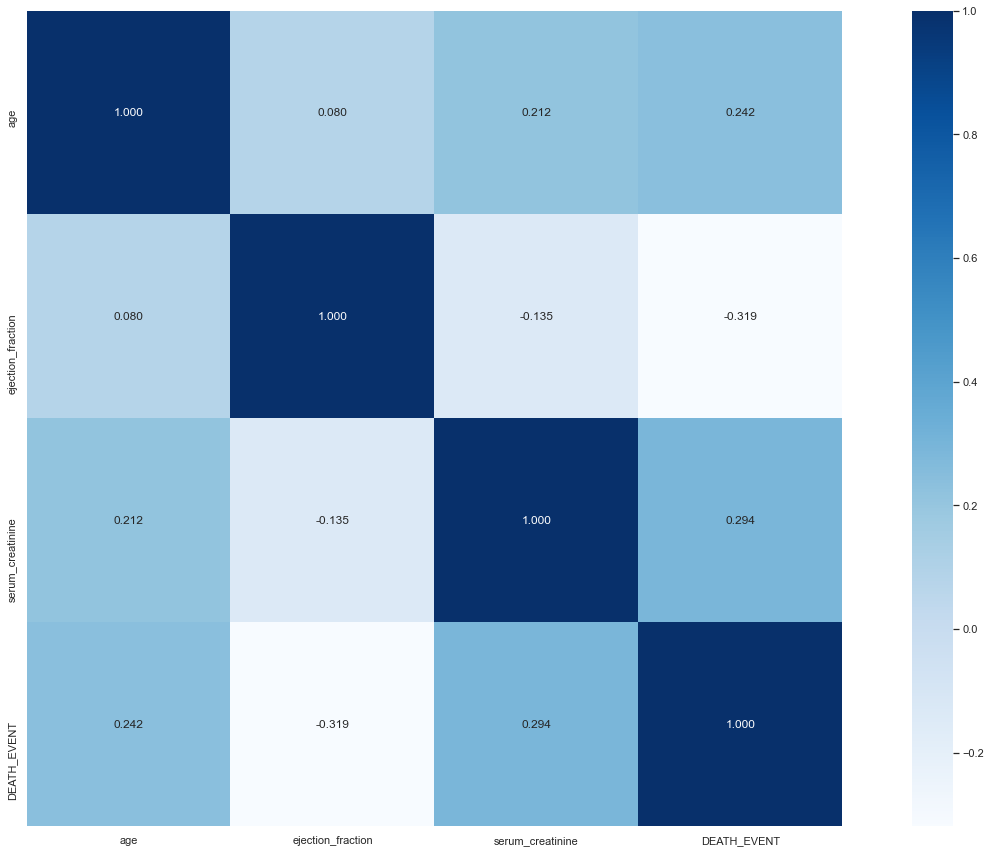

In [13]:
plt.figure(figsize=(25,15))
df_train_corr = df_train_scaled.corr()

sns.heatmap(df_train_scaled.corr(), square=True, annot=True, cmap="Blues", fmt=".3f")
sns.set(font_scale=1.7)

## Defining independent and dependent variables

In [14]:
X_train=df_train_scaled.iloc[:, 0:-1]
y_train=df_train_scaled.iloc[:,-1]
X_test=df_test_scaled.iloc[:,0:-1]
y_test=df_test_scaled.iloc[:,-1]
#print(X_train)
print(y_train)


0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
234    0.0
235    0.0
236    0.0
237    1.0
238    0.0
Name: DEATH_EVENT, Length: 239, dtype: float64


In [15]:
# from imblearn.over_sampling import SMOTE

# # setting up testing and training sets
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# sm = SMOTE(sampling_strategy = 'auto')
# X_train, y_train = sm.fit_sample(X_train, y_train)


## Training the model


### SVM model

In [16]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1, 1, 10,100],'gamma':[0.1, 1, 10] }
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred_SVM_CV = clf.predict(X_test)

print("Using the score funtion:",clf.score(X_test,y_test))
print("The best param is:", clf.best_params_)

#for i in clf.cv_results_:
#    print(i)
#print(clf.cv_results_['params'])
#print(clf.cv_results_['mean_test_score'])

#checking results
cm = confusion_matrix(y_test, y_pred_SVM_CV)
print(cm)
print("Accuracy Score:",accuracy_score(y_test, y_pred_SVM_CV))
print("F1 score:",f1_score(y_test, y_pred_SVM_CV, average='macro'))
print("MCC Score:",matthews_corrcoef(y_test, y_pred_SVM_CV))

Using the score funtion: 0.7333333333333333
The best param is: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
[[32  5]
 [11 12]]
Accuracy Score: 0.7333333333333333
F1 score: 0.7
MCC Score: 0.4171309643104571


In [17]:
# h = .002
# x_min, x_max = X_train.iloc[:,4].min() - .002, X_train.iloc[:,4].max() + .002
# y_min, y_max = X_train.iloc[:,7].min() - .002, X_train.iloc[:,7].max() + .002
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # just plot the dataset first
# from matplotlib.colors import ListedColormap
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# plt.title("Input data (training)")
# plt.xlabel('attribute 4')
# plt.ylabel('Attribute 7')
# # Plot the training points
# plt.scatter(X_train.iloc[:,4], X_train.iloc[:,7], c=y_train, cmap=cm_bright, edgecolors='k')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks()
# plt.yticks()
# plt.show()


# from sklearn.model_selection import GridSearchCV
# if hasattr(clf, "decision_function"):
#  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# else:
#  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# # Plot the training points
# plt.title("Random forest(train set)")
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())

# plt.show()

In [18]:
# from sklearn.metrics import roc_curve, auc
# y_score = clf.fit(X_train, y_train).decision_function(X_test)
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(2):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plt.figure()
# lw = 2
# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

### Neural network

In [19]:
#Trying Neural Networks (multilayer perceptron)
from sklearn.neural_network import MLPClassifier
maxScore = 0
maxi = 0
maxj = 0
for i in range(2,6):
    for j in range(2,6):
        clf_nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(i,j),random_state = 1)
        clf_nn.fit(X_train, y_train)#,batch_size=57, epochs=1000, validation_split=0.2)
        y_pred_nn = clf_nn.predict(X_test)
        print("*"*20)
#         print(clf_nn.loss_)
        print("loss = %f" %(clf_nn.loss_))



        cm = confusion_matrix(y_test, y_pred_nn)
        print("This is when the layer sizes is: %i,%i" %(i,j))
        print(cm)
        Score = accuracy_score(y_test, y_pred_nn)
        print(Score)
        if (Score > maxScore):
            maxScore= Score
            maxi = i
            maxj = j
        print("F1 score:",f1_score(y_test, y_pred_nn, average='macro'))
        print("MCC Score:",matthews_corrcoef(y_test, y_pred_nn))
print("the best score was when the layer size was: %i,%i with a score of %04f" %(maxi,maxj,maxScore))


********************
loss = 0.615403
This is when the layer sizes is: 2,2
[[37  0]
 [23  0]]
0.6166666666666667
F1 score: 0.3814432989690722
MCC Score: 0.0
********************
loss = 0.615403
This is when the layer sizes is: 2,3
[[37  0]
 [23  0]]
0.6166666666666667
F1 score: 0.3814432989690722
MCC Score: 0.0
********************
loss = 0.615403
This is when the layer sizes is: 2,4
[[37  0]
 [23  0]]
0.6166666666666667
F1 score: 0.3814432989690722
MCC Score: 0.0
********************
loss = 0.615403
This is when the layer sizes is: 2,5
[[37  0]
 [23  0]]
0.6166666666666667
F1 score: 0.3814432989690722
MCC Score: 0.0
********************
loss = 0.615403
This is when the layer sizes is: 3,2
[[37  0]
 [23  0]]
0.6166666666666667
F1 score: 0.3814432989690722
MCC Score: 0.0
********************
loss = 0.496708
This is when the layer sizes is: 3,3
[[34  3]
 [16  7]]
0.6833333333333333
F1 score: 0.6029258098223615
MCC Score: 0.29127540765095955
********************
loss = 0.475924
This is whe

C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\phuoc\anaconda3\lib\site-packages\sk

********************
loss = 0.495183
This is when the layer sizes is: 3,5
[[35  2]
 [15  8]]
0.7166666666666667
F1 score: 0.6447230929989551
MCC Score: 0.38325711533020995
********************
loss = 0.615403
This is when the layer sizes is: 4,2
[[37  0]
 [23  0]]
0.6166666666666667
F1 score: 0.3814432989690722
MCC Score: 0.0
********************
loss = 0.615403
This is when the layer sizes is: 4,3
[[37  0]
 [23  0]]
0.6166666666666667
F1 score: 0.3814432989690722
MCC Score: 0.0
********************
loss = 0.464532
This is when the layer sizes is: 4,4
[[34  3]
 [14  9]]
0.7166666666666667
F1 score: 0.6571428571428573
MCC Score: 0.3770751436050835
********************
loss = 0.494826
This is when the layer sizes is: 4,5
[[34  3]
 [13 10]]
0.7333333333333333
F1 score: 0.6825396825396826
MCC Score: 0.41742755148618044
********************
loss = 0.455359
This is when the layer sizes is: 5,2
[[34  3]
 [11 12]]
0.7666666666666667
F1 score: 0.730423620025674
MCC Score: 0.49478280832979943
**

### Random Forest 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV


calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=20))


pipe = Pipeline([('select', SelectKBest()),('model', calibrated_forest)])
param_grid = {'select__k': [1, 2],'model__base_estimator__max_depth': [2, 4, 6, 8]}



search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)
y_pred_Pipe = search.predict(X_test)


print("Using the score funtion:",search.score(X_test,y_test))
print("The best param is:", search.best_params_)

cm = confusion_matrix(y_test, y_pred_Pipe)
print(cm)
print("Accuracy Score:",accuracy_score(y_test, y_pred_Pipe))
print("F1 score:",f1_score(y_test, y_pred_Pipe, average='macro'))
print("MCC Score:",matthews_corrcoef(y_test, y_pred_Pipe))


Using the score funtion: 0.7166666666666667
The best param is: {'model__base_estimator__max_depth': 2, 'select__k': 2}
[[33  4]
 [13 10]]
Accuracy Score: 0.7166666666666667
F1 score: 0.6678606317160534
MCC Score: 0.3755234672789861


## Feature Ranking  

[0.32175929 0.30733734 0.37090337]
[0.37090337 0.32175929 0.30733734]
Feature ranking:
(239, 3)
1. feature 2 (0.370903)
2. feature 0 (0.321759)
3. feature 1 (0.307337)


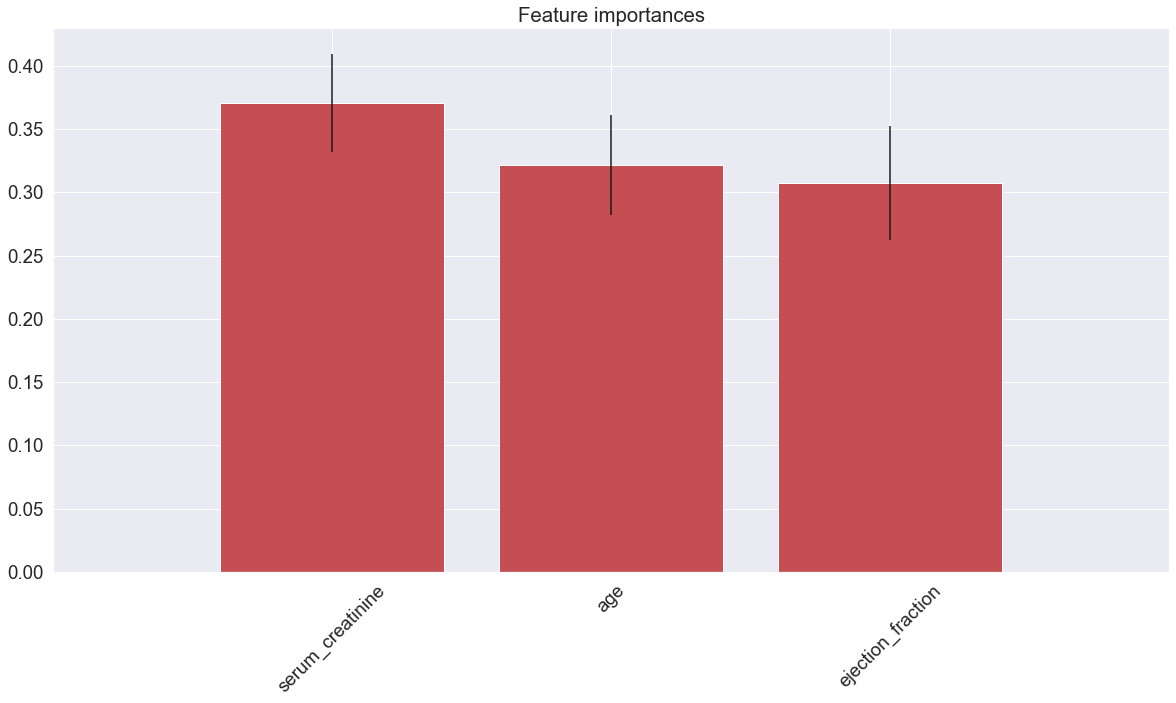

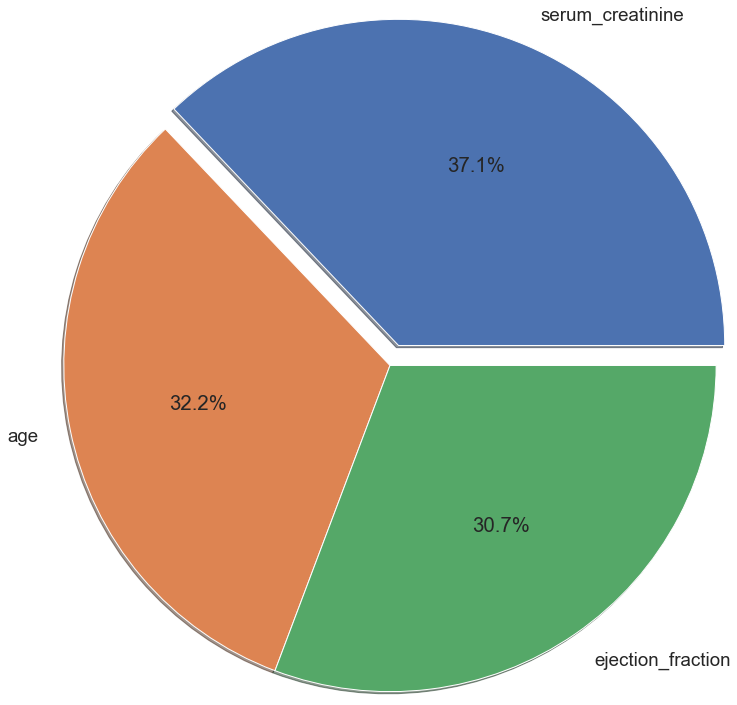

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
print(importances)
indices = np.argsort(importances)[::-1]
sort=np.sort(importances)[::-1]
print(sort)
# Print the feature ranking
print("Feature ranking:")
print(X_train.shape)

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), df.columns[indices])
plt.xticks(rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

plt.figure()
#plt.title("Feature importances")
plt.pie(importances[indices],radius = 3,autopct='%1.1f%%' ,labels = df.columns[indices],
       explode=(.2,0,0),shadow=True)
       #explode=(.2,0,0,0,0,0,0,0,0,0,0),shadow=True)
#plt.xticks(range(X_train.shape[1]), indices)
#plt.xlim([-1, X_train.shape[1]])

plt.show()



In [22]:
from sklearn.linear_model import LogisticRegression
parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'C':[0.1, 1, 10,100],'fit_intercept':[True,False],'penalty':['l1', 'l2']}
clf = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Using the score funtion:",clf.score(X_test,y_test))
print("The best param is:", clf.best_params_)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred, average='macro'))
print("MCC Score:",matthews_corrcoef(y_test, y_pred))

#print(y_pred)
#print(accuracy_score(y_test, y_pred))
#print(clf.predict_proba(X_test))
#plt.figure(figsize=(10, 10))
#plt.scatter(clf.predict_proba(X_test)[:,1],y_pred)
#plt.scatter(clf.predict_proba(X_train)[:,1],y_train)



C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\model_selectio

Using the score funtion: 0.75
The best param is: {'C': 10, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
[[35  2]
 [13 10]]
Accuracy Score: 0.75
F1 score: 0.6974789915966386
MCC Score: 0.4627740398789661


C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\model_selectio

0.75


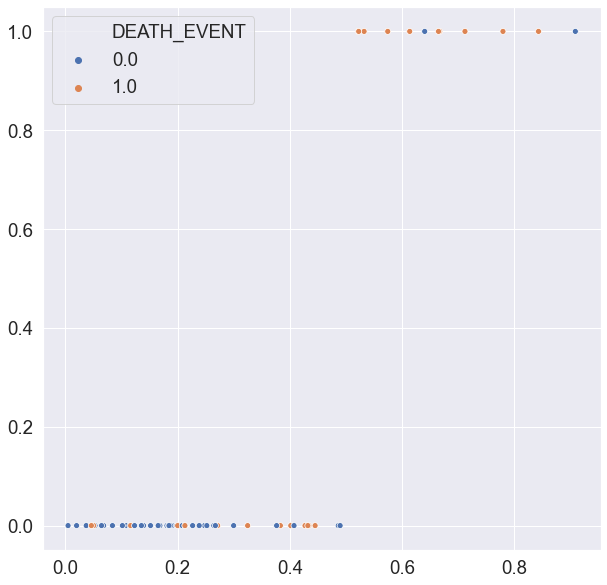

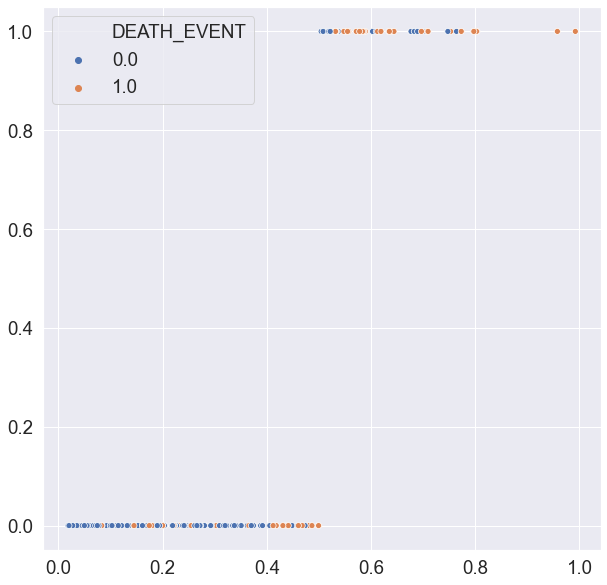

F1 score: 0.6974789915966386
MCC Score: 0.4627740398789661


In [23]:
y_pred=clf.predict(X_test)
#print(y_pred)
print(accuracy_score(y_test, y_pred))
#print(clf.predict_proba(X_test))
List = []
List.append(clf.predict_proba(X_test)[:,1])
List.append(y_pred)
List.append(y_test)
plt.figure(figsize=(10, 10))
sns.set_style()
sns.scatterplot(x=clf.predict_proba(X_test)[:,1], y=y_pred, hue=y_test)
plt.show()
plt.figure(figsize=(10, 10))
y_pred_2=clf.predict(X_train)
sns.scatterplot(x=clf.predict_proba(X_train)[:,1], y=y_pred_2, hue=y_train) 
plt.show()
#plt.scatter(clf.predict_proba(X_test)[:,1],y_pred)
cm_lm= confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,10))
# print(cm_lm)
# plt.scatter(clf.predict_proba(X_train)[:,1],y_train)
print("F1 score:",f1_score(y_test, y_pred, average='macro'))
print("MCC Score:",matthews_corrcoef(y_test, y_pred))

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred, average='macro'))
print("MCC Score:",matthews_corrcoef(y_test, y_pred))

[[34  3]
 [15  8]]
Accuracy Score: 0.7
F1 score: 0.6306429548563611
MCC Score: 0.33517120022123903


In [25]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 7)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [26]:
# var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)
# var #cumulative sum of variance explained with [n] feature
# plt.xlabel('# of Features')
# plt.title('PCA Analysis')
# plt.ylim(20,100.5)
# plt.style.context('seaborn-whitegrid')
# plt.xticks()
# plt.plot(var)

In [27]:
# from sklearn.naive_bayes import CategoricalNB
# gnb_c = CategoricalNB()
# y_pred = gnb_c.fit(X_train, y_train).predict(X_test)
# cm_gnb_c = confusion_matrix(y_test, y_pred)
# print(cm_gnb_c)
# print("Accuracy Score:",accuracy_score(y_test, y_pred))
# print("F1 score:",f1_score(y_test, y_pred, average='macro'))

### Clustering

In [28]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [29]:
# Import custom k-means implementation.
from sklearn.cluster import KMeans

# Set K-Means parameters.
num_clusters = 2  # Number of clusters into which we want to split our training dataset.
max_iterations = 500  # maximum number of training iterations.

# Init K-Means instance.
k_means = KMeans(n_clusters=num_clusters,max_iter=max_iterations,tol=1e-100).fit(X)
x_pred = k_means.predict(X)
Cluster_Loc = k_means.cluster_centers_

Max_iteration_list = [1,10,100,500,1000,5000,10000]
for i in Max_iteration_list:
    k_means = KMeans(n_clusters=num_clusters,max_iter=i).fit(X)
    x_pred = k_means.predict(X)
    k_score = k_means.score(X)
    print(i,k_score)

1 -55777.984899865405
10 -54010.21148704523
100 -54010.21148704523
500 -54010.21148704523
1000 -54010.21148704523
5000 -54010.21148704523
10000 -54010.21148704523


In [30]:
# print(Cluster_Loc)
# print()
# #print(x_pred)


age
ejection_fraction
serum_creatinine
3


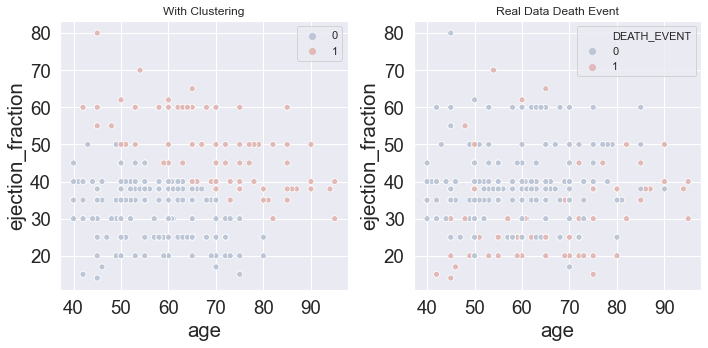

In [31]:
#understanding Pandas
ListAttr = []
lengthOfList = len(X)
for i in X:
    print(i)
    ListAttr.append(i)
print(len(ListAttr))    

for i in range(len(ListAttr)-1):
    for j in range(i+1,len(ListAttr)-1):
        f, axes = plt.subplots(1, 2)
        
        #plt.figure(figsize=(10, 10))
        sns.set(rc={'figure.figsize':(10,5)})
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=x_pred, ax=axes[0],palette="vlag").set_title('With Clustering')
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=Y, ax=axes[1],palette="vlag").set_title('Real Data Death Event')
        f.tight_layout()
        plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, accuracy_score

cm = confusion_matrix(Y, x_pred)
print(cm)

AC =accuracy_score(Y, x_pred)
mse=mean_squared_error(Y,x_pred)
r2=r2_score(Y,x_pred)

print('Mean Squared error Score:\t',mse,'\nR^2 Error Score:\t\t',r2,'\nAccuracy Score Score:\t\t',AC)
yy = 0
yn = 0
ny = 0
nn = 0
for i in range(len(Y)):
    if (Y[i] == x_pred[i]):
        if (Y[i]):
            yy +=1
        else:
            nn +=1
    else:
        if(Y[i]):
            yn +=1
        else:
            ny +=1

print("actual yes & Pred yes: ",yy)
print("actual no & Pred yes: ",ny)
print("actual yes & Pred no: ",yn)
print("actual no & Pred no: ",nn)
print(nn+yy,ny+yn)

print("Accuracy Score:",accuracy_score(Y, x_pred))
print("F1 score:",f1_score(Y, x_pred, average='macro'))
print("MCC Score:",matthews_corrcoef(y_test, y_pred))

[[136  67]
 [ 63  33]]
Mean Squared error Score:	 0.43478260869565216 
R^2 Error Score:		 -0.9945607553366176 
Accuracy Score Score:		 0.5652173913043478
actual yes & Pred yes:  33
actual no & Pred yes:  67
actual yes & Pred no:  63
actual no & Pred no:  136
169 130
Accuracy Score: 0.5652173913043478
F1 score: 0.5066758046502182
MCC Score: 0.33517120022123903


In [33]:
# Import custom k-means implementation.
from sklearn.cluster import AgglomerativeClustering

# Set K-Means parameters.
num_clusters = 2  # Number of clusters into which we want to split our training dataset.
max_iterations = 500  # maximum number of training iterations.

# Init K-Means instance.
agl = AgglomerativeClustering(n_clusters=num_clusters).fit(X)
x_pred = agl.fit_predict(X)
#Cluster_Loc = agl.cluster_centers_

# Max_iteration_list = [1,10,100,500,1000,5000,10000]
# for i in Max_iteration_list:
#     agl = AgglomerativeClustering(n_clusters=num_clusters,max_iter=i).fit(X)
#     x_pred = agl.predict(X)
#     k_score = agl.score(X)
#     print(i,k_score)

age
ejection_fraction
serum_creatinine
3


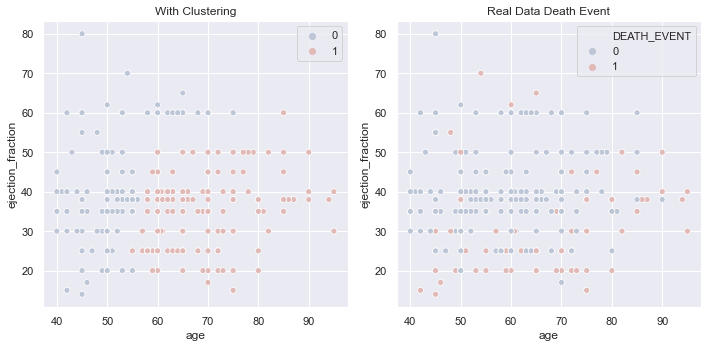

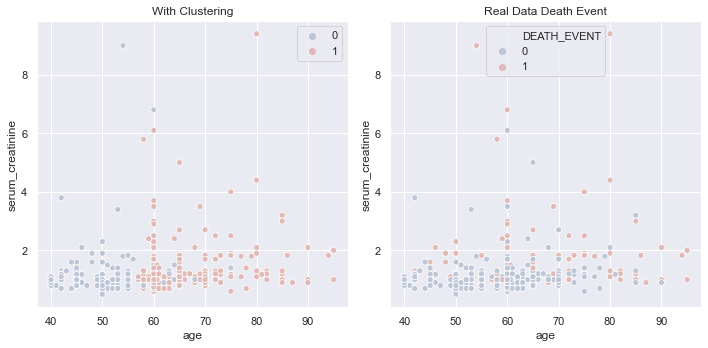

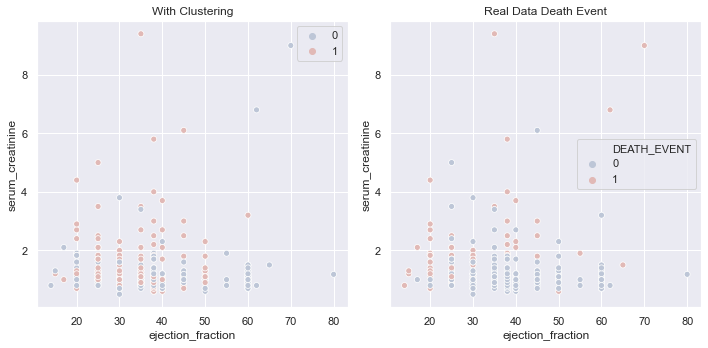

In [34]:
#understanding Pandas
ListAttr = []
lengthOfList = len(X)
for i in X:
    print(i)
    ListAttr.append(i)
print(len(ListAttr))    

for i in range(len(ListAttr)):
    for j in range(i+1,len(ListAttr)):
        f, axes = plt.subplots(1, 2)
        
        #plt.figure(figsize=(10, 10))
        sns.set(rc={'figure.figsize':(10,5)})
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=x_pred, ax=axes[0],palette="vlag").set_title('With Clustering')
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=Y, ax=axes[1],palette="vlag").set_title('Real Data Death Event')
        f.tight_layout()
        plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, accuracy_score

cm = confusion_matrix(Y, x_pred)
print(cm)

AC =accuracy_score(Y, x_pred)
mse=mean_squared_error(Y,x_pred)
r2=r2_score(Y,x_pred)

print('Mean Squared error Score:\t',mse,'\nR^2 Error Score:\t\t',r2,'\nAccuracy Score Score:\t\t',AC)
yy = 0
yn = 0
ny = 0
nn = 0
for i in range(len(Y)):
    if (Y[i] == x_pred[i]):
        if (Y[i]):
            yy +=1
        else:
            nn +=1
    else:
        if(Y[i]):
            yn +=1
        else:
            ny +=1

print("actual yes & Pred yes: ",yy)
print("actual no & Pred yes: ",ny)
print("actual yes & Pred no: ",yn)
print("actual no & Pred no: ",nn)
print(nn+yy,ny+yn)

print("Accuracy Score:",accuracy_score(Y, x_pred))
print("F1 score:",f1_score(Y, x_pred, average='macro'))
print("MCC Score:",matthews_corrcoef(y_test, y_pred))

[[107  96]
 [ 29  67]]
Mean Squared error Score:	 0.4180602006688963 
R^2 Error Score:		 -0.9178468801313631 
Accuracy Score Score:		 0.5819397993311036
actual yes & Pred yes:  67
actual no & Pred yes:  96
actual yes & Pred no:  29
actual no & Pred no:  107
174 125
Accuracy Score: 0.5819397993311036
F1 score: 0.5743214769763443
MCC Score: 0.33517120022123903


## Now that we determined what is considered high risk for heart failure, We will now do 4 clusters. This will tell who has high risk or low risk of heart failiure

In [36]:
# # Import custom k-means implementation.
# from sklearn.cluster import KMeans

# # Set K-Means parameters.
# num_clusters = 4  # Number of clusters into which we want to split our training dataset.
# max_iterations = 500  # maximum number of training iterations.

# # Init K-Means instance.
# k_means = KMeans(n_clusters=num_clusters,max_iter=max_iterations).fit(X)
# x_pred = k_means.predict(X)
# Cluster_Loc = k_means.cluster_centers_

# print(Cluster_Loc)
# print()
# print(x_pred)


In [37]:
# #understanding Pandas
# ListAttr = []
# lengthOfList = len(X)
# for i in X:
#     print(i)
#     ListAttr.append(i)
# print(len(ListAttr))    

# for i in range(len(ListAttr)-1):
#     for j in range(i+1,len(ListAttr)-1):
#         f, axes = plt.subplots(1, 2)
        
#         #plt.figure(figsize=(10, 10))
#         sns.set(rc={'figure.figsize':(10,5)})
#         sns.set_style()
#         sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=x_pred, ax=axes[0],palette="vlag").set_title('With Clustering')
#         sns.set_style()
#         sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=Y, ax=axes[1],palette="vlag").set_title('Real Data Death Event')
#         f.tight_layout()
#         plt.show()


## conclusion: What information did we learn